# Задание 1

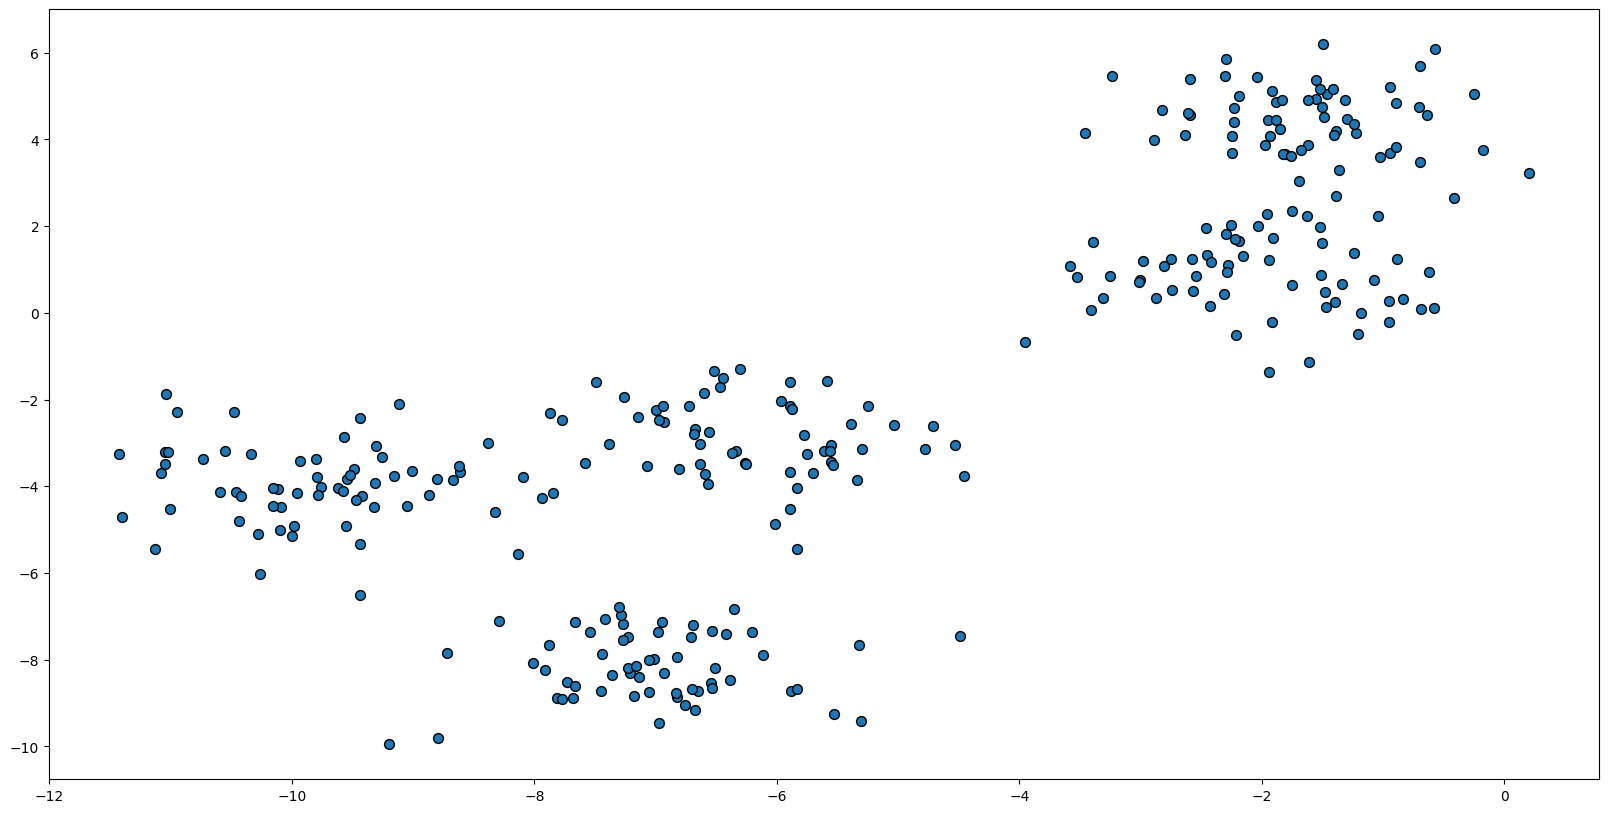

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans


X, y = make_blobs(n_samples=300, centers=5, cluster_std=0.85, random_state=1)


plt.figure(figsize=(20, 10))
plt.scatter(X[:, 0], X[:, 1], s=50, edgecolor='k')
plt.show()

n = 2
silhouette score = 0.65488803407687
calinski harabasz score = 937.653713448297
davies bouldin score = 0.499190438864389

n = 3
silhouette score = 0.608014408720123
calinski harabasz score = 933.8894745017769
davies bouldin score = 0.5865838263501709

n = 4
silhouette score = 0.6204798086517801
calinski harabasz score = 1001.7085673911731
davies bouldin score = 0.5049911559615943

n = 5
silhouette score = 0.6163373649682039
calinski harabasz score = 1533.2393672714002
davies bouldin score = 0.5392636615443331

n = 6
silhouette score = 0.5374028234757037
calinski harabasz score = 1303.902101109067
davies bouldin score = 0.8004949045713748

n = 7
silhouette score = 0.456090494141378
calinski harabasz score = 1179.7474088961999
davies bouldin score = 0.925236289249888

n = 8
silhouette score = 0.4607541130475832
calinski harabasz score = 1157.9056637486656
davies bouldin score = 0.9415264338839295

n = 9
silhouette score = 0.4019654676824952
calinski harabasz score = 1093.35287662248

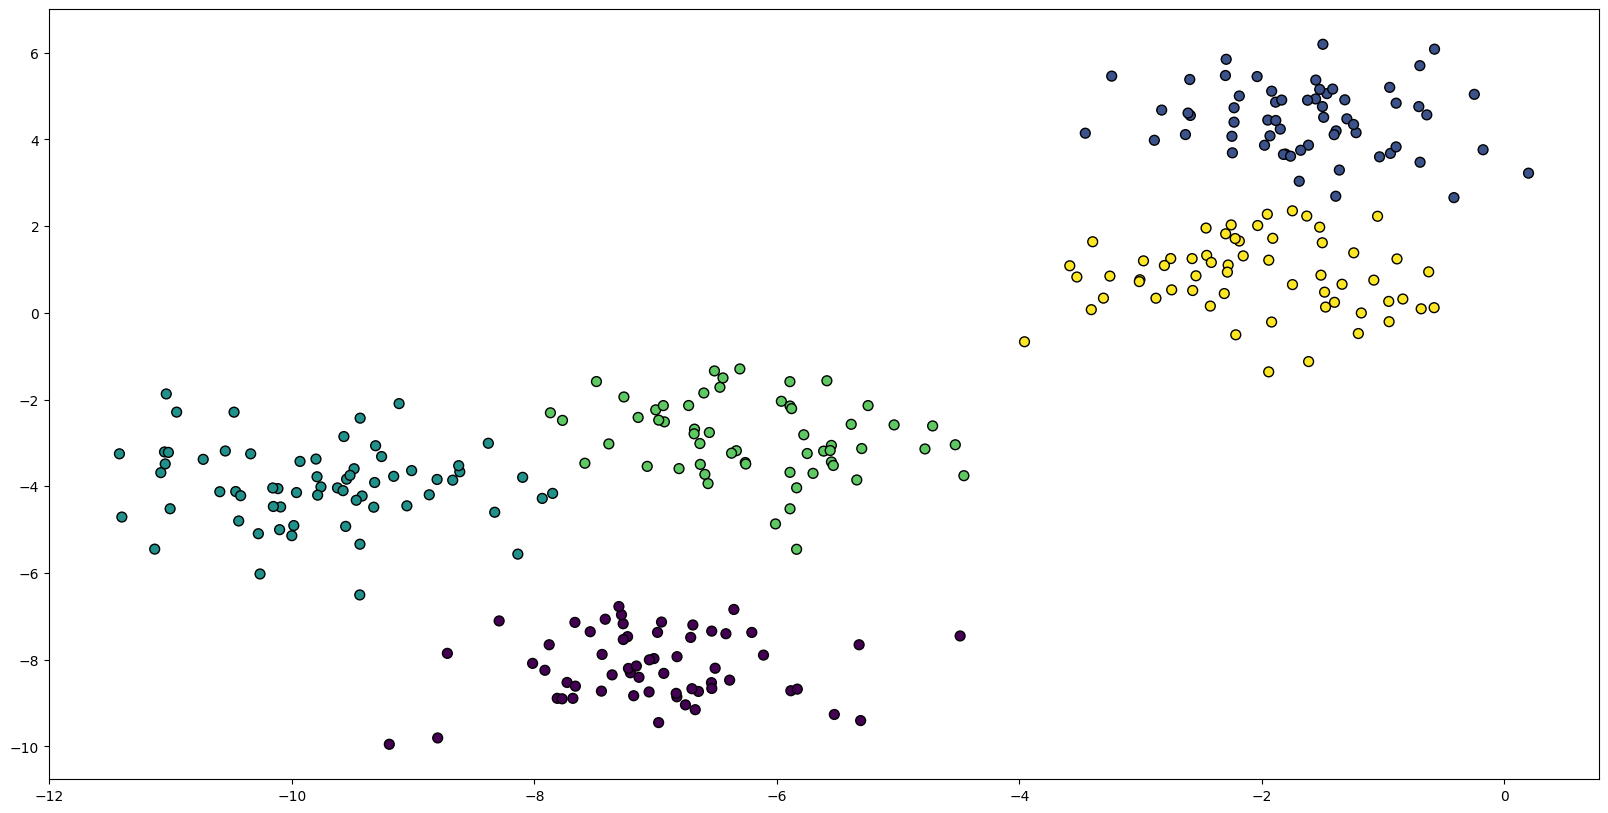

In [34]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score # Внутренние метрики (не использую label)


for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, random_state=0, n_init='auto').fit(X)
    labels = kmeans.labels_
    print(f"n = {i}")
    print(f"silhouette score = {silhouette_score(X, labels)}")
    print(f"calinski harabasz score = {calinski_harabasz_score(X, labels)}")
    print(f"davies bouldin score = {davies_bouldin_score(X, labels)}")
    print()



plt.figure(figsize=(20, 10))
plt.scatter(X[:, 0], X[:, 1], s=50,edgecolor='k', c=KMeans(n_clusters=5, random_state=0, n_init='auto').fit(X).labels_, cmap='viridis')
plt.show()

# Задание 2

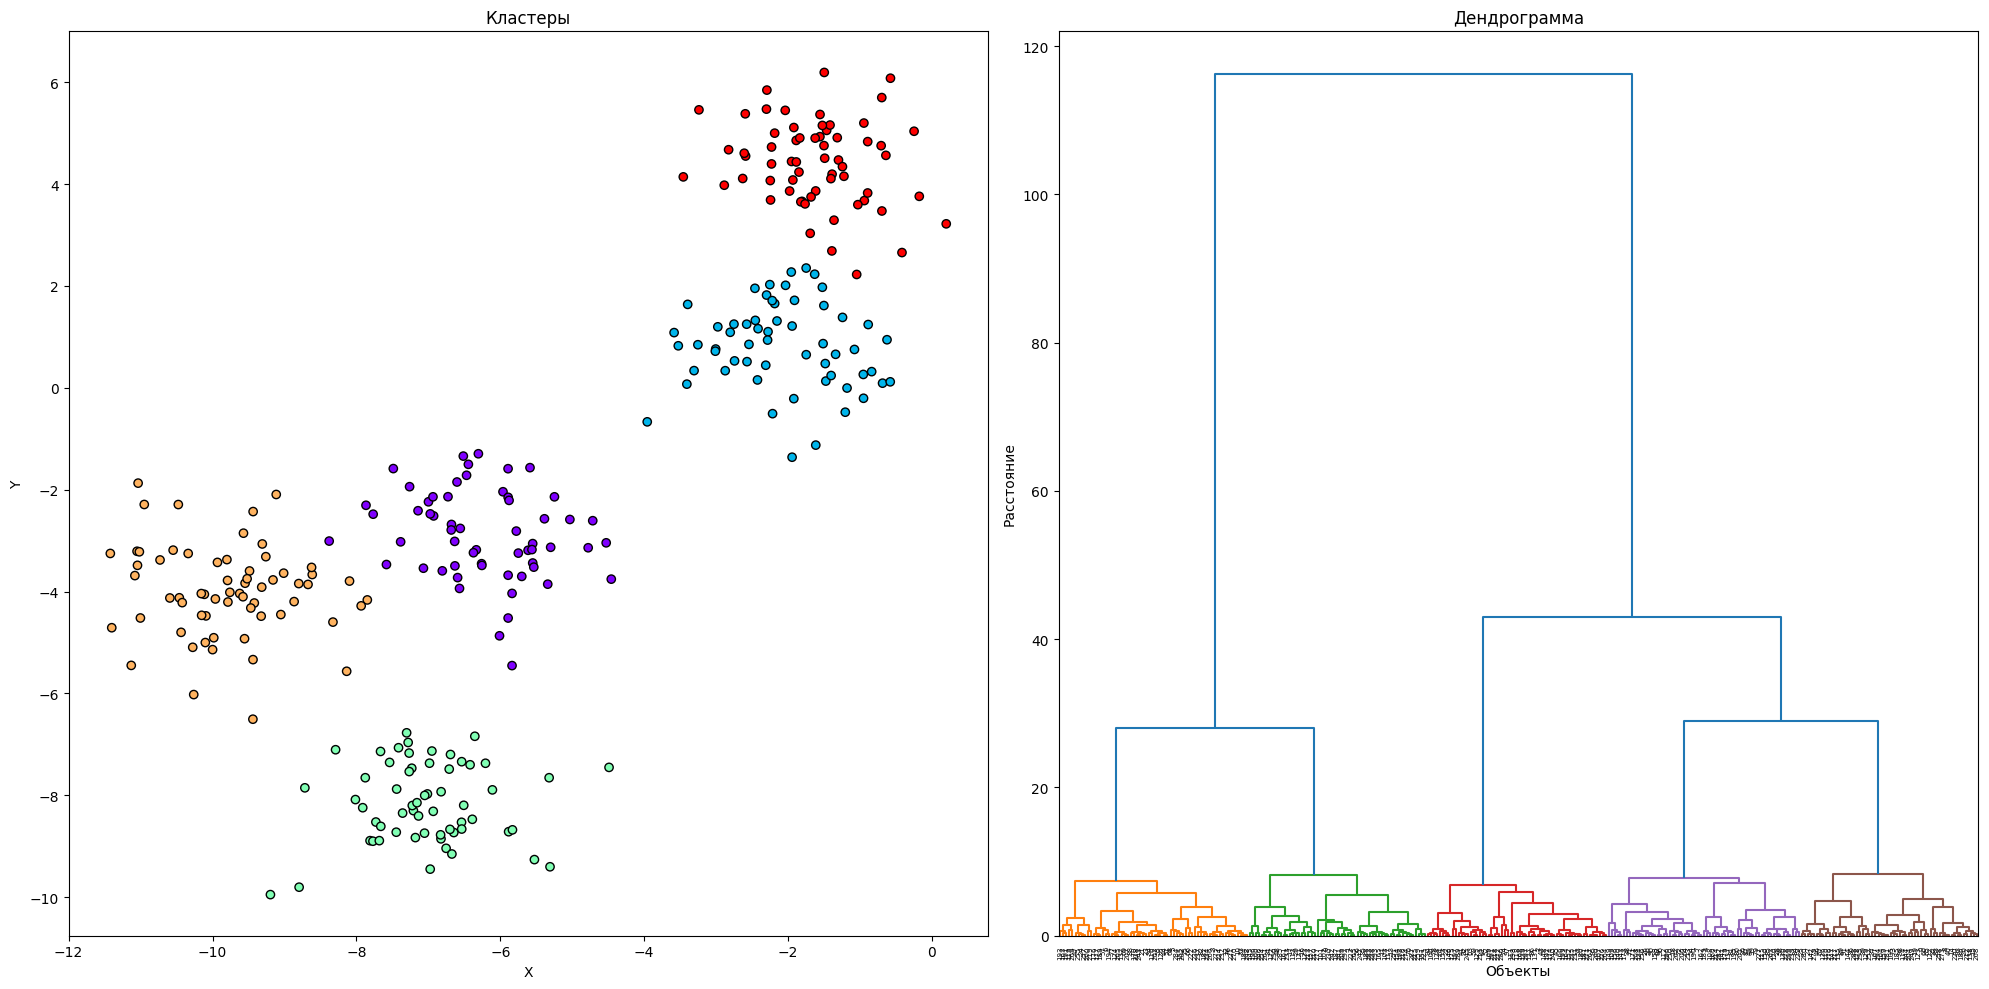

In [35]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

agglom = AgglomerativeClustering(n_clusters=5, linkage='ward')

clusters = agglom.fit_predict(X)

Z = linkage(X, method='ward')


fig, axs = plt.subplots(1, 2, figsize=(20, 10))


axs[0].scatter(X[:, 0], X[:, 1], c=clusters, cmap='rainbow', edgecolor='k')
axs[0].set_title('Кластеры')
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')


dendrogram(Z, ax=axs[1], color_threshold=20)
axs[1].set_title('Дендрограмма')
axs[1].set_xlabel('Объекты')
axs[1].set_ylabel('Расстояние')

plt.tight_layout()
plt.show()

# Задание 3

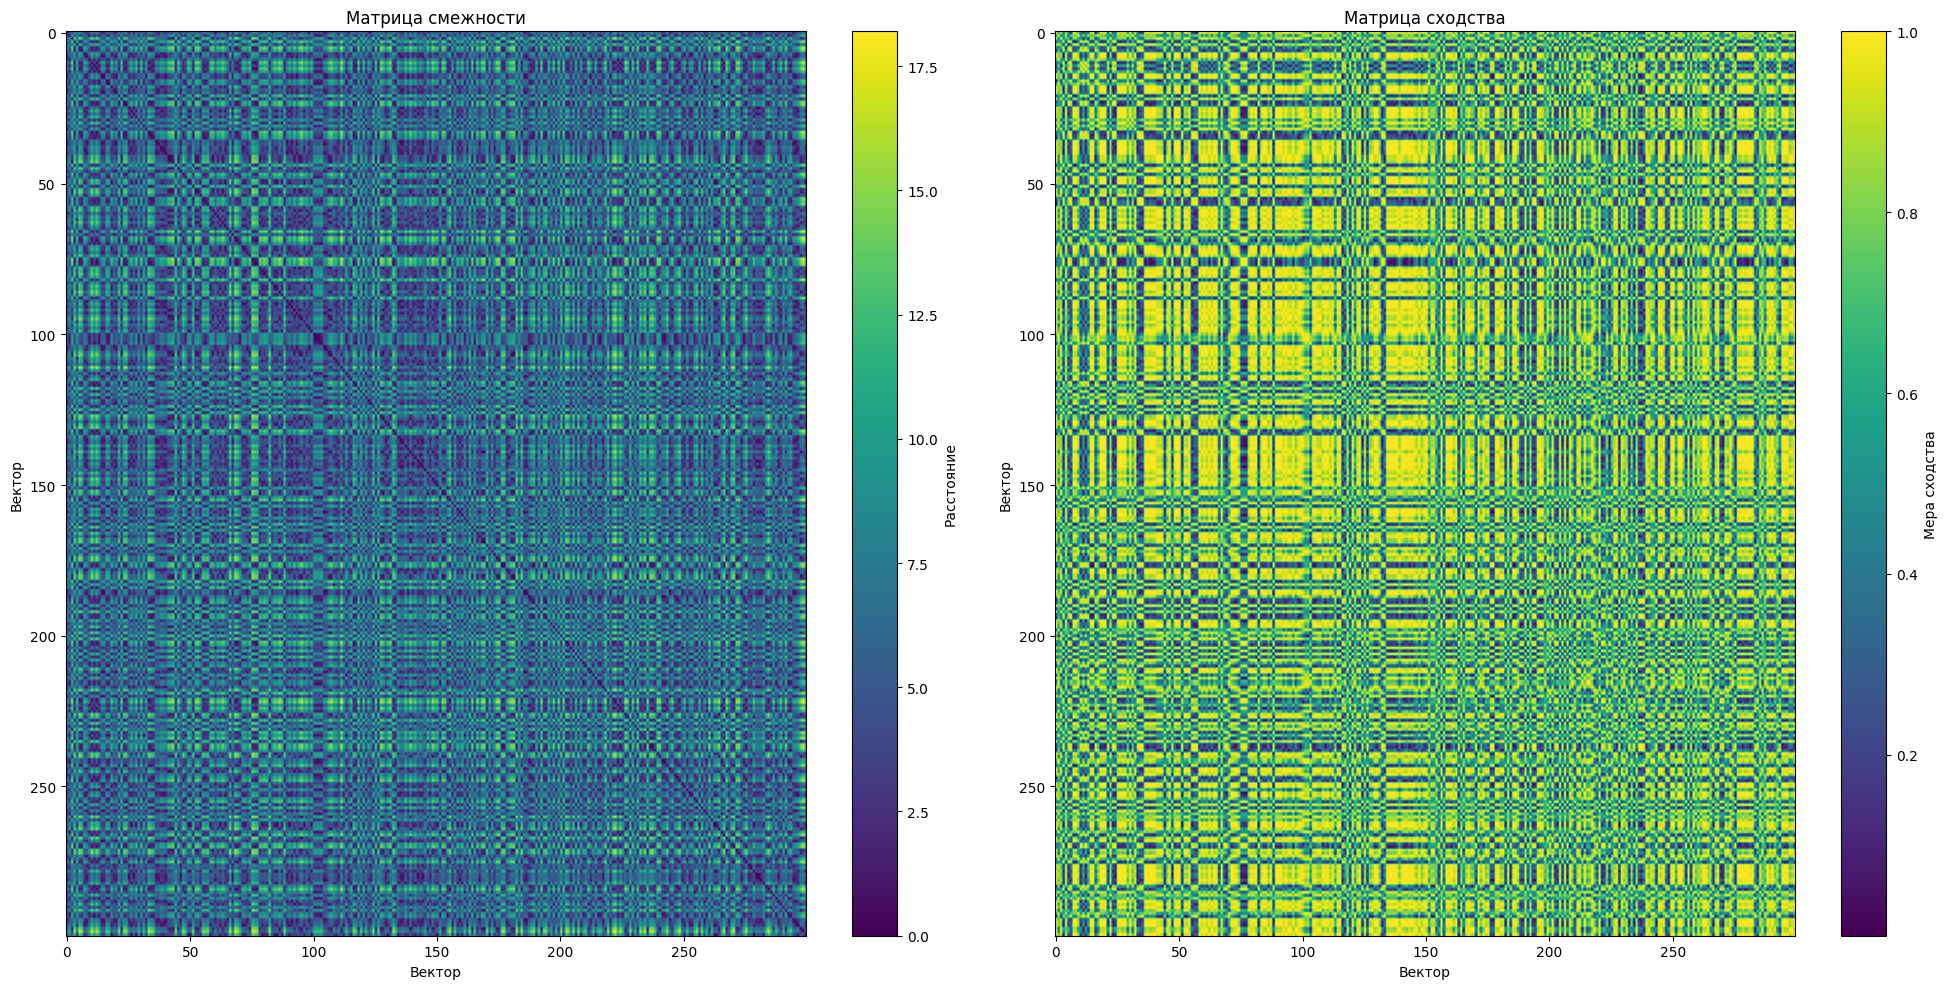

In [36]:
from sklearn.metrics import pairwise_distances

def evkld(x, y):
    return np.sum((x-y)**2)**(1/2)

def pobedin(x, y):
    res = (x @ y)/ np.sqrt((x @ x) * (y @ y))
    if res == -1:
        return 1/2
    else:
        return np.abs(res)

matrix_smegnost = pairwise_distances(X, metric=evkld)
metrix_shodstvo = pairwise_distances(X, metric=pobedin)

fig, axes = plt.subplots(1, 2, figsize=(20, 10))

cax1 = axes[0].imshow(matrix_smegnost, cmap='viridis', aspect='auto')
axes[0].set_title('Матрица смежности')
axes[0].set_xlabel('Вектор')
axes[0].set_ylabel('Вектор')
fig.colorbar(cax1, ax=axes[0], label='Расстояние')

# Второй сабплот
cax2 = axes[1].imshow(metrix_shodstvo, cmap='viridis', aspect='auto')
axes[1].set_title('Матрица сходства')
axes[1].set_xlabel('Вектор')
axes[1].set_ylabel('Вектор')
fig.colorbar(cax2, ax=axes[1], label='Мера сходства')

plt.tight_layout()
plt.show()

# Задание 4

x          y           z  label
0 -35.283431 -21.779673 -113.964124    1.0
1 -35.603636 -18.430420 -113.298009    1.0
2 -34.202934 -22.362906 -106.979709    1.0

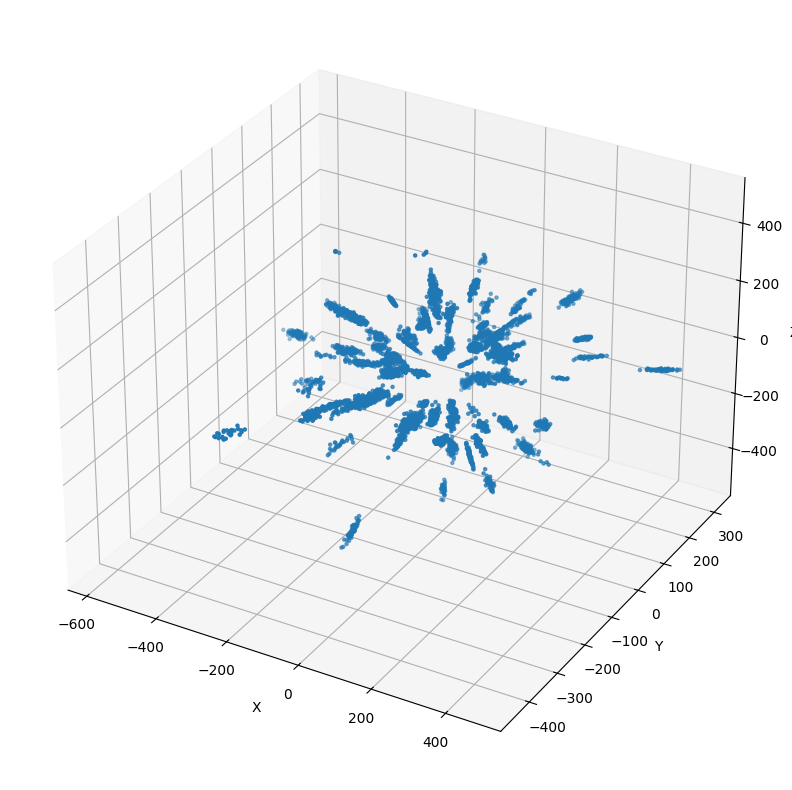

In [37]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import hdbscan
from sklearn.metrics import adjusted_rand_score as ari
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import MeanShift, AgglomerativeClustering


data = pd.read_csv("toy_galaxies.csv") # Не забудьте скачать файл
display(data.head(3))

# Отобразим датасет
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
Axes3D.scatter(ax, data.x,data.y,data.z, marker='.')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

In [38]:
# Эта функция понадобится для отображения результата кластеризации и ARI
def plot_galaxies(data,cluster):
    fig = plt.figure(figsize=(20,10))

    ax = fig.add_subplot(111, projection='3d')
    Axes3D.scatter(ax,data.x, data.y, data.z, marker='.', c=cluster.labels_);
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()

    ARI = round(ari(data.label,cluster.labels_),4) # считаем ARI - оценка качества кластеризации


    print('ARI = {}'.format(ARI))

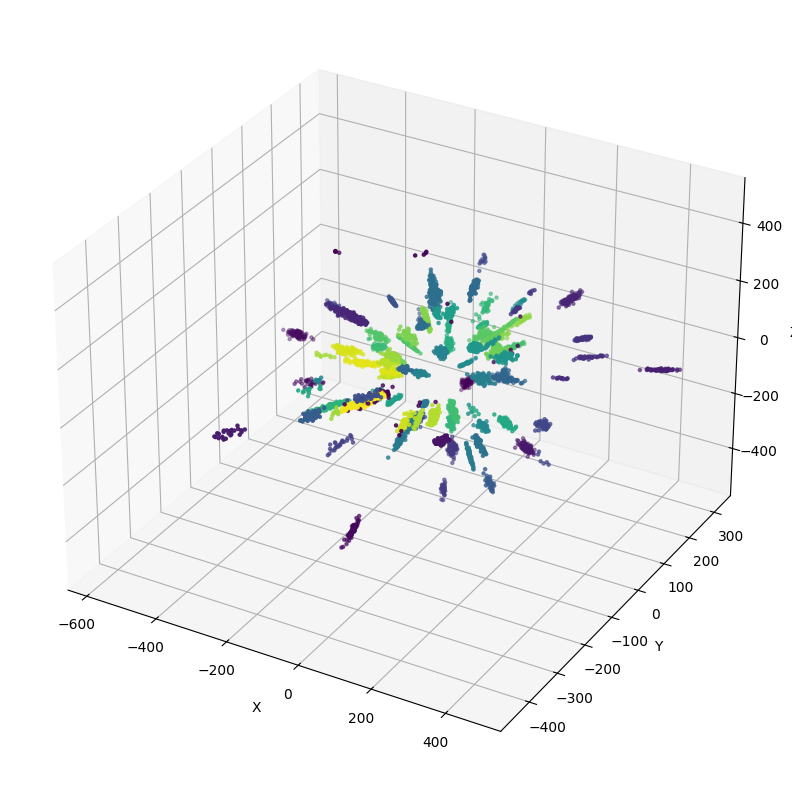

ARI = 0.9105


In [39]:
# hdbscan работает следующим образом
cluster = hdbscan.HDBSCAN(metric="l1",
                          min_cluster_size=10,
                          algorithm="generic",
                          alpha=0.3,
                          cluster_selection_method='eom',
                          leaf_size=100)

cluster.fit(data[['x','y','z']].to_numpy())

plot_galaxies(data,cluster) # Отображаем кластеризацию и полученный ARI